<a href="https://colab.research.google.com/github/MegaHotCoder/m/blob/main/ML_firstKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [14]:
df = pd.read_csv('/content/gdrive/MyDrive/DataStore/train_dataset.csv')
testD = pd.read_csv('/content/gdrive/MyDrive/DataStore/test_dataset.csv')

In [16]:
testD.head()

,id,station,station_name,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,...,wind_speed_22,wind_speed_23,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp
0,0,99,파주,06-26,0.0,0.0,0.0,1.0,3.0,6.0,...,0.5,0.3,0.2,0.9,0.8,0.6,0.9,1.0,2.0,23.964286
1,1,119,수원,01-11,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1,1.0,0.6,0.5,0.7,0.2,0.1,0.1,0.3,-2.776786
2,2,119,수원,02-23,5.0,6.0,0.0,0.0,0.0,0.0,...,0.4,0.6,0.2,0.3,1.1,0.7,0.7,1.4,1.6,2.100000
3,3,119,수원,05-29,0.0,0.0,0.0,0.0,0.0,0.0,...,1.2,0.5,0.3,0.5,1.4,0.8,1.3,0.9,1.0,19.648214
4,4,119,수원,06-15,0.0,4.0,2.0,4.0,8.0,8.0,...,1.2,2.3,0.8,0.8,0.2,1.1,0.6,3.3,1.8,21.964286


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Columns: 342 entries, id to target
dtypes: float64(338), int64(2), object(2)
memory usage: 34.3+ MB


In [5]:
for col in df.columns:
    print(col)

id
station
station_name
date
cloud_cover_0
cloud_cover_1
cloud_cover_10
cloud_cover_11
cloud_cover_12
cloud_cover_13
cloud_cover_14
cloud_cover_15
cloud_cover_16
cloud_cover_17
cloud_cover_18
cloud_cover_19
cloud_cover_2
cloud_cover_20
cloud_cover_21
cloud_cover_22
cloud_cover_23
cloud_cover_3
cloud_cover_4
cloud_cover_5
cloud_cover_6
cloud_cover_7
cloud_cover_8
cloud_cover_9
dew_point_0
dew_point_1
dew_point_10
dew_point_11
dew_point_12
dew_point_13
dew_point_14
dew_point_15
dew_point_16
dew_point_17
dew_point_18
dew_point_19
dew_point_2
dew_point_20
dew_point_21
dew_point_22
dew_point_23
dew_point_3
dew_point_4
dew_point_5
dew_point_6
dew_point_7
dew_point_8
dew_point_9
humidity_0
humidity_1
humidity_10
humidity_11
humidity_12
humidity_13
humidity_14
humidity_15
humidity_16
humidity_17
humidity_18
humidity_19
humidity_2
humidity_20
humidity_21
humidity_22
humidity_23
humidity_3
humidity_4
humidity_5
humidity_6
humidity_7
humidity_8
humidity_9
local_pressure_0
local_pressure_1
local_p

In [6]:
print(df['station'].value_counts())

station
108    2191
112    2191
203    2189
98     2187
201    2187
202    2187
Name: count, dtype: int64


In [7]:
print(df['station_name'].value_counts())

station_name
서울     2191
인천     2191
이천     2189
동두천    2187
강화     2187
양평     2187
Name: count, dtype: int64


In [17]:
#delete column

df = df.drop('station_name', axis=1)



KeyError: "['station_name'] not found in axis"

In [21]:
testD = testD.drop('station_name', axis = 1)

In [22]:
testD.tail()

,id,station,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,...,wind_speed_22,wind_speed_23,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp
4374,4374,119,06-10,1.0,5.0,1.0,2.0,8.0,9.0,3.0,...,1.6,1.4,0.8,1.1,0.5,0.4,0.4,2.1,1.8,21.912500
4375,4375,99,04-12,0.0,0.0,0.0,1.0,2.0,3.0,1.0,...,1.0,0.7,0.0,0.7,0.4,3.0,2.2,1.9,3.7,12.235714
4376,4376,119,06-23,4.0,5.0,8.0,2.0,2.0,2.0,4.0,...,2.4,1.3,2.4,2.7,2.5,2.8,2.8,2.0,2.8,23.178571
4377,4377,119,05-04,4.0,5.0,9.0,7.0,3.0,1.0,1.0,...,4.0,4.9,0.2,0.8,0.3,0.5,0.6,0.9,2.4,16.385714
4378,4378,99,05-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.4,0.4,1.1,0.8,3.3,2.3,2.3,1.2,2.9,16.953571


In [23]:
# date 손보기
df[['month', 'day']] = df['date'].str.split('-', expand=True)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

testD[['month', 'day']] = testD['date'].str.split('-', expand=True)
testD['month'] = testD['month'].astype(int)
testD['day'] = testD['day'].astype(int)

In [24]:
df = df.drop('date', axis=1)


KeyError: "['data'] not found in axis"

In [28]:
testD = testD.drop('date', axis = 1)

In [26]:
df.tail()

,id,station,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,...,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target,month,day
13127,17506,203,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,1.1,0.9,1.5,1.5,1.1,-3.485714,0.785714,12,26
13128,17507,203,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.1,0.5,0.4,0.6,0.5,0.1,-2.632143,-0.367857,12,27
13129,17508,203,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.9,1.9,1.4,0.6,1.0,-1.555357,1.055357,12,28
13130,17509,203,9.0,9.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.1,0.7,0.4,0.5,0.0,0.9,-2.814286,6.614286,12,29
13131,17510,203,6.0,3.0,1.0,2.0,4.0,0.0,1.0,6.0,...,0.3,0.1,0.2,0.1,0.4,0.3,-4.487500,5.287500,12,30


In [29]:
testD.tail()

,id,station,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,...,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,month,day
4374,4374,119,1.0,5.0,1.0,2.0,8.0,9.0,3.0,8.0,...,0.8,1.1,0.5,0.4,0.4,2.1,1.8,21.912500,6,10
4375,4375,99,0.0,0.0,0.0,1.0,2.0,3.0,1.0,6.0,...,0.0,0.7,0.4,3.0,2.2,1.9,3.7,12.235714,4,12
4376,4376,119,4.0,5.0,8.0,2.0,2.0,2.0,4.0,5.0,...,2.4,2.7,2.5,2.8,2.8,2.0,2.8,23.178571,6,23
4377,4377,119,4.0,5.0,9.0,7.0,3.0,1.0,1.0,2.0,...,0.2,0.8,0.3,0.5,0.6,0.9,2.4,16.385714,5,4
4378,4378,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1,0.8,3.3,2.3,2.3,1.2,2.9,16.953571,5,11


In [12]:
df[(df['station'] == 98) & (df['month'] == 1) & (df['day'] == 1)]

,id,station,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,...,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target,month,day
0,0,98,0.0,0.0,9.0,0.0,3.0,3.0,1.0,0.0,...,0.3,0.7,0.6,0.7,0.8,0.1,-2.707143,-3.992857,1,1
365,365,98,9.0,8.0,9.0,7.0,8.0,9.0,8.0,8.0,...,1.7,1.1,0.0,1.6,0.2,0.3,-2.707143,2.107143,1,1
731,731,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.7,0.9,0.0,0.8,0.1,0.1,-2.707143,-3.592857,1,1
1096,1096,98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3,0.4,1.0,0.9,1.2,0.5,-2.707143,0.607143,1,1
1460,1460,98,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.4,0.3,0.4,0.1,-2.707143,-4.092857,1,1
1824,1824,98,0.0,0.0,8.0,8.0,8.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,-9999.0,-9999.0,-2.707143,4.607143,1,1


In [30]:
#station 전부 삭제

df = df.drop('station', axis=1)

In [31]:
testD = testD.drop('station', axis = 1)

In [32]:
df.head()

,id,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,cloud_cover_16,...,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target,month,day
0,0,0.0,0.0,9.0,0.0,3.0,3.0,1.0,0.0,0.0,...,0.3,0.7,0.6,0.7,0.8,0.1,-2.707143,-3.992857,1,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.1,1.3,0.5,0.9,0.4,-3.646429,-1.653571,1,2
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.8,0.9,1.0,1.1,0.1,-2.694643,-0.005357,1,3
3,3,0.0,0.0,2.0,0.0,0.0,1.0,2.0,4.0,3.0,...,0.5,0.2,0.5,1.3,0.5,0.2,-2.501786,-0.898214,1,4
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.6,1.4,1.8,0.5,1.1,0.6,-2.625000,-1.775000,1,5


In [33]:
testD.head()

,id,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,cloud_cover_16,...,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,month,day
0,0,0.0,0.0,0.0,1.0,3.0,6.0,9.0,10.0,9.0,...,0.2,0.9,0.8,0.6,0.9,1.0,2.0,23.964286,6,26
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,0.5,0.7,0.2,0.1,0.1,0.3,-2.776786,1,11
2,2,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.3,1.1,0.7,0.7,1.4,1.6,2.100000,2,23
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.3,0.5,1.4,0.8,1.3,0.9,1.0,19.648214,5,29
4,4,0.0,4.0,2.0,4.0,8.0,8.0,6.0,9.0,5.0,...,0.8,0.8,0.2,1.1,0.6,3.3,1.8,21.964286,6,15


In [39]:
#cloud_cover불측값 관측

for i in range(24):
    col = f"cloud_cover_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

cloud_cover_0: NaN = 187, -9999 = 0
cloud_cover_1: NaN = 212, -9999 = 0
cloud_cover_2: NaN = 196, -9999 = 0
cloud_cover_3: NaN = 192, -9999 = 0
cloud_cover_4: NaN = 200, -9999 = 0
cloud_cover_5: NaN = 206, -9999 = 0
cloud_cover_6: NaN = 209, -9999 = 0
cloud_cover_7: NaN = 226, -9999 = 0
cloud_cover_8: NaN = 230, -9999 = 0
cloud_cover_9: NaN = 211, -9999 = 0
cloud_cover_10: NaN = 216, -9999 = 0
cloud_cover_11: NaN = 206, -9999 = 0
cloud_cover_12: NaN = 201, -9999 = 0
cloud_cover_13: NaN = 206, -9999 = 0
cloud_cover_14: NaN = 213, -9999 = 0
cloud_cover_15: NaN = 194, -9999 = 0
cloud_cover_16: NaN = 208, -9999 = 0
cloud_cover_17: NaN = 199, -9999 = 0
cloud_cover_18: NaN = 196, -9999 = 0
cloud_cover_19: NaN = 195, -9999 = 0
cloud_cover_20: NaN = 197, -9999 = 0
cloud_cover_21: NaN = 190, -9999 = 0
cloud_cover_22: NaN = 185, -9999 = 0
cloud_cover_23: NaN = 189, -9999 = 0


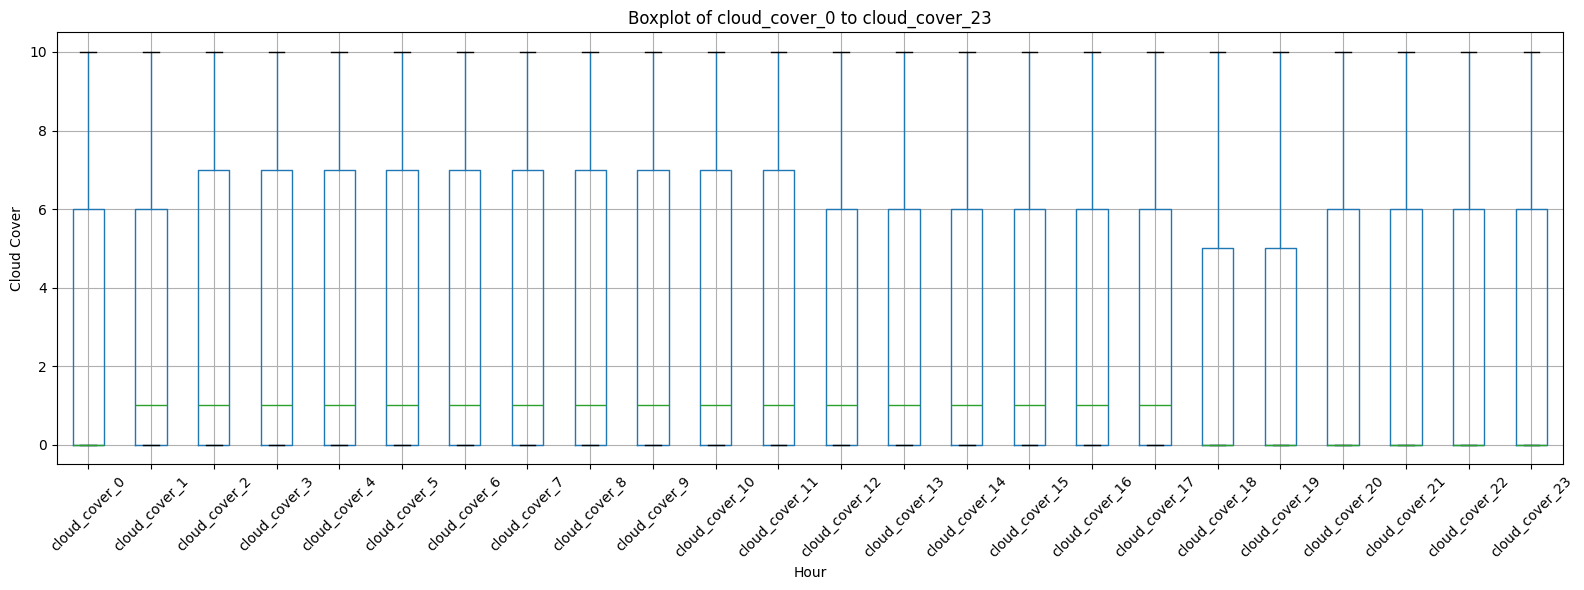

In [42]:
columns = [f"cloud_cover_{i}" for i in range(24)]

# 2. Boxplot 그리기
plt.figure(figsize=(16, 6))
df[columns].boxplot()

# 3. Plot 꾸미기
plt.xticks(rotation=45)
plt.title("Boxplot of cloud_cover_0 to cloud_cover_23")
plt.xlabel("Hour")
plt.ylabel("Cloud Cover")
plt.grid(True)
plt.tight_layout()
plt.show()

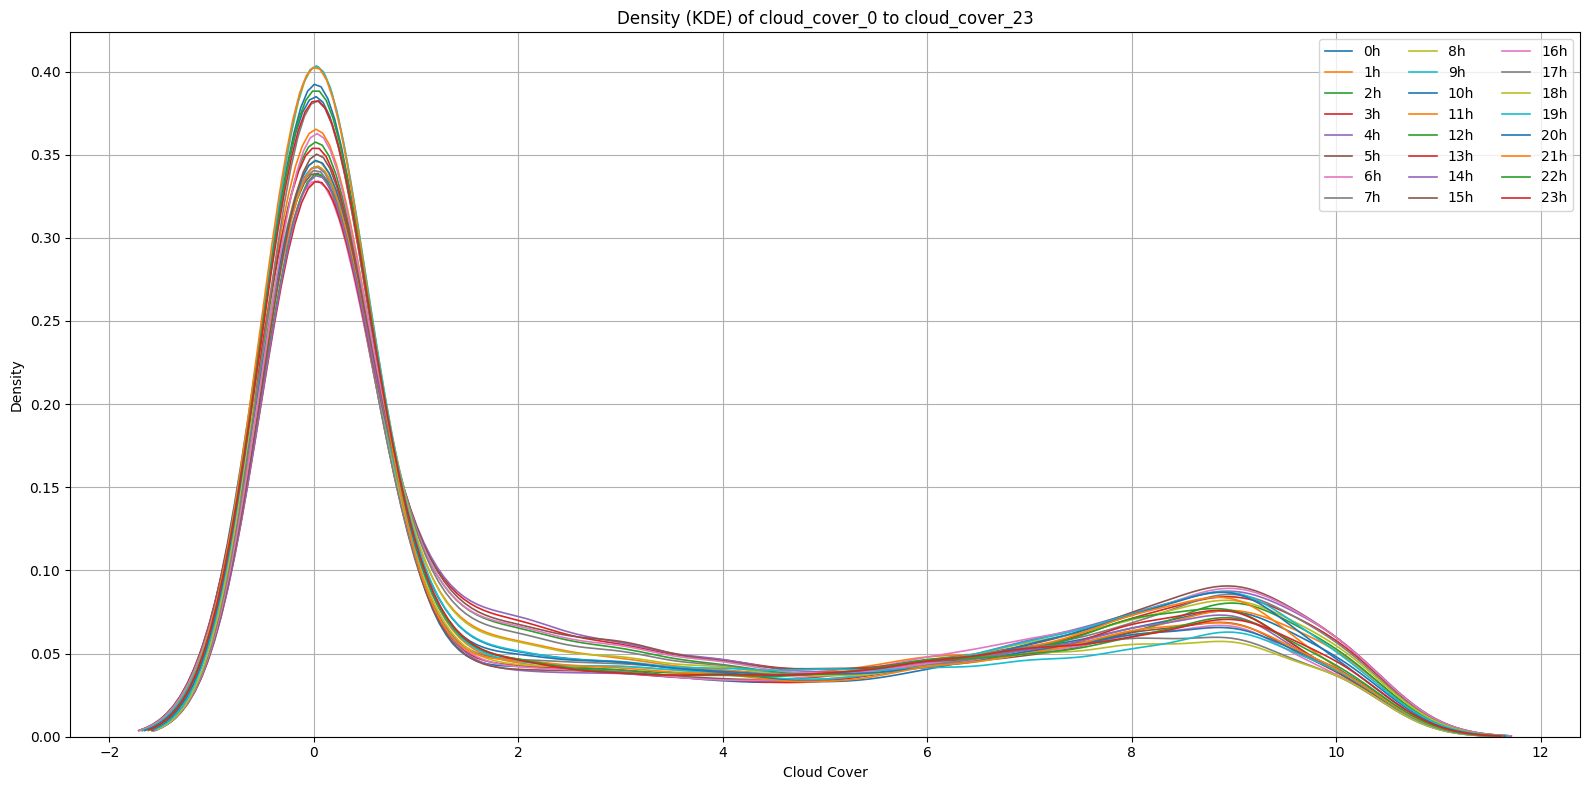

In [41]:
columns = [f"cloud_cover_{i}" for i in range(24)]

# 2. Boxplot 그리기
columns = [f"cloud_cover_{i}" for i in range(24)]
df_filtered = df[columns].replace(-9999, pd.NA)

# 전체 KDE 그리기
plt.figure(figsize=(16, 8))

for i in range(24):
    col = f"cloud_cover_{i}"
    sns.kdeplot(df_filtered[col].dropna(), label=f"{i}h", linewidth=1.2)

plt.title("Density (KDE) of cloud_cover_0 to cloud_cover_23")
plt.xlabel("Cloud Cover")
plt.ylabel("Density")
plt.legend(loc="upper right", ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()